In [8]:
from main import *
import pandas as pd

Below an example of how a classical predator-prey simulation would look like with positive parameters.

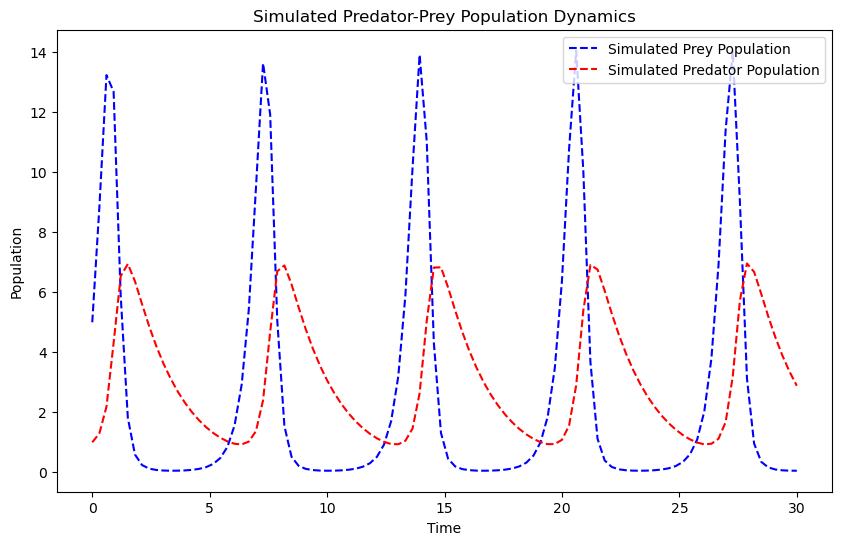

In [9]:
alpha = 3
beta = 1
delta = .2
gamma = .5
params = (alpha,
          beta,
          delta,
          gamma)
y_0 = np.array([5,1]) # initial population
t = np.linspace(0,30,100)
simulated = odeint(lv_system, y_0, t, args=params)
x = simulated[:,0]
y = simulated[:,1]

plt.figure(figsize=(10, 6))
plt.plot(t, x, 'b--',label='Simulated Prey Population')
plt.plot(t, y, 'r--',label='Simulated Predator Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Simulated Predator-Prey Population Dynamics')
plt.legend(loc='upper right')
plt.show()
T = 2*np.pi/np.sqrt(alpha*gamma)

Display the loaded data to know what it looks like and plot it

In [10]:
data

,t,x,y
0,0.000000,4.781635,3.035257
1,0.202020,6.114005,2.189746
2,0.404040,6.238361,1.478907
3,0.606061,5.520524,0.989836
4,0.808081,4.582546,0.957827
...,...,...,...
95,19.191919,0.310346,1.241890
96,19.393939,0.324595,1.437257
97,19.595960,0.258083,1.562810
98,19.797980,0.283680,1.834171


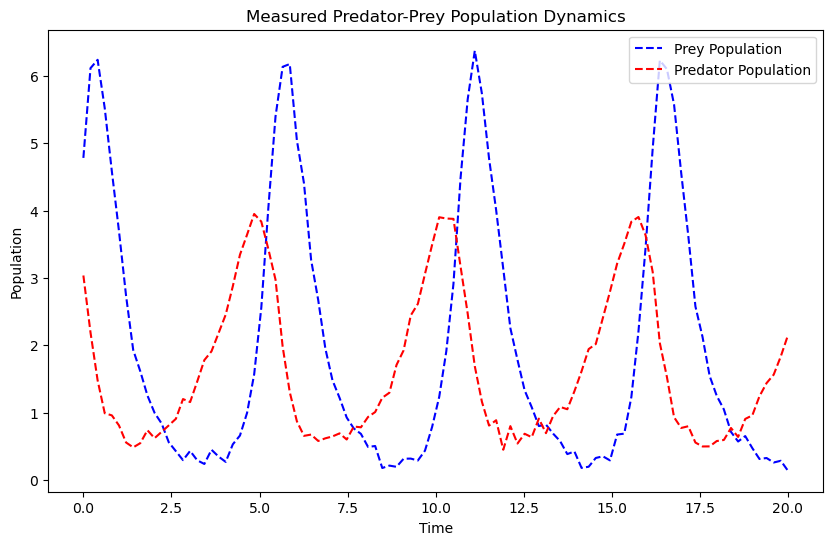

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data['t'],data['x'],'b--',label='Prey Population')
plt.plot(data['t'],data['y'],'r--',label='Predator Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Measured Predator-Prey Population Dynamics')
plt.legend(loc='upper right')
plt.show()

Starting Parameters: [-1.         -0.58946135 -0.39533502 -1.46000065]


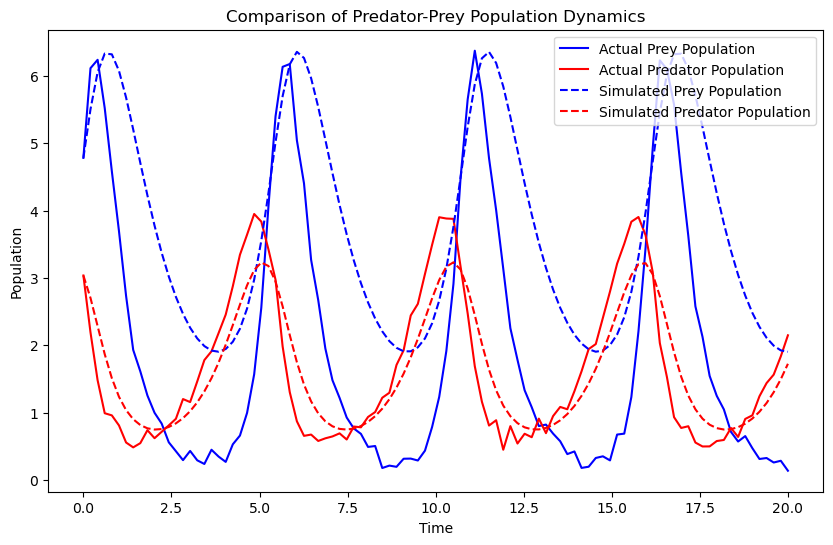

In [12]:
# initial guesses and approximations
T = 5.2 
alpha = -1
beta = alpha/data['y'][0]-0.26 
gamma = 1/alpha * (2*np.pi/T)**2
delta = gamma/data['x'][0]-0.09
starting = np.array([alpha,beta,delta,gamma])
print("Starting Parameters:", starting)
plot_sim( np.array([alpha,beta,delta,gamma]),data)

In [65]:
starting = np.array([alpha,beta,delta,gamma]) # initial guesses
starting = np.array([-2.02748912, -1.13671319, -0.44162828, -0.84144125]) # initial guess from previous fitting runs
print("Starting Parameters:", starting)
temp = 8

for i in range(1):
    
    optimized_params =optimize_parameters(data,method = 'simulated_annealing', func='mae', i=5000, temp = temp, array= starting)
    print("Optimized Parameters:", optimized_params)
    sse_error, mae_error = calculate_errors(optimized_params, data)
    print("Error (SSE) between simulated and original data:", sse_error)
    print("Error (MAE) between simulated and original data:", mae_error)
    starting = optimized_params
    #plot_sim(optimized_params, data)
    if i>0:
        if previous_error<=mae_error:
            temp*=2
            print('temperature increased')
        else:
            temp/=2
            print('temperature decreased')
    previous_error = mae_error
    print(np.shape(sim_lv(optimized_params,data['t'])))


Starting Parameters: [-2.02748912 -1.13671319 -0.44162828 -0.84144125]


c:\Users\bruno\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: overflow encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():
c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: divide by zero encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():


Optimized Parameters: [-2.02748912 -1.13671319 -0.44162828 -0.84144125]
Error (SSE) between simulated and original data: 2.994004075138656
Error (MAE) between simulated and original data: 0.1897823707369809
(100, 2)


In [94]:
# Example real data (replace with your actual observed data)
time_steps = data['t']
observed_predators = data['x']
observed_prey = data['y']

# Number of simulations
num_simulations = 10

starting = np.array([alpha,beta,delta,gamma])
alpha = -2

# Example simulated data (replace with your actual simulated data)
num_simulations = 5
simulated_populations = [sim_lv(optimize_parameters(data,method = 'simulated_annealing', func='mae', i=5000, temp = temp, array= starting), time_steps) for _ in range(num_simulations)]
print(np.shape(simulated_populations))



c:\Users\bruno\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: overflow encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():
c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: divide by zero encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():


(5, 100, 2)


(100, 2)
[[4.78163509 3.03525736]
 [5.53822321 2.07850074]
 [5.46581082 1.37086043]
 [4.85028555 0.94327346]
 [4.04732473 0.70480633]
 [3.26523821 0.57639962]
 [2.58797088 0.51186884]
 [2.03433494 0.48711053]
 [1.50568622 0.49004239]
 [1.12072291 0.51494747]
 [0.84405507 0.559632  ]
 [0.64666932 0.62403105]
 [0.506574   0.70952796]
 [0.40782477 0.81862757]
 [0.33923033 0.95288397]
 [0.29321728 1.11473661]
 [0.26500263 1.29945994]
 [0.25211805 1.51000119]
 [0.25433968 1.75628059]
 [0.2741791  2.04139077]
 [0.31832834 2.36653666]
 [0.40095613 2.72825197]
 [0.55073766 3.10661443]
 [0.82483492 3.41123178]
 [1.33126094 3.63975275]
 [2.2373907  3.68535846]
 [3.65662104 3.41126773]
 [5.03506242 2.65524807]
 [5.59091366 1.8406495 ]
 [5.35358291 1.24162956]
 [4.66592352 0.87296783]
 [3.8547698  0.66650847]
 [3.09328028 0.55644103]
 [2.44519186 0.50297282]
 [1.84460322 0.48558919]
 [1.36674549 0.49409953]
 [1.02056386 0.52381099]
 [0.77247039 0.57312722]
 [0.59577988 0.64237197]
 [0.47060229 0.7

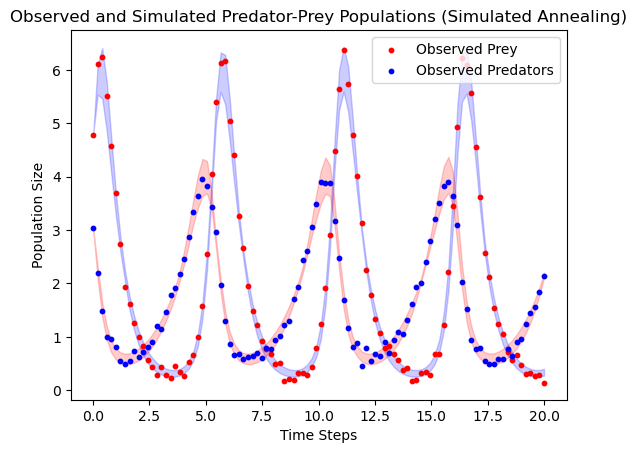

In [100]:
min, max = np.ones(simulated_populations[0].shape)*1000, np.zeros(simulated_populations[0].shape)

print(np.shape(min))
for sim in simulated_populations:
    for idx, (i,j) in enumerate(sim):
        if i < min[idx,0]:
            min[idx,0] = i
        if i > max[idx,0]:
            max[idx,0] = i
        if j > max[idx,1]:
            max[idx,1] = j
        if j < min[idx,1]:
            min[idx,1] = j

print(min)

fig, ax = plt.subplots()
ax.fill_between(time_steps, min[:,0], max[:,0], color='blue', alpha=.2)
ax.fill_between(time_steps, min[:,1], max[:,1], color='red', alpha=.2)
ax.set_title('fill between y1 and 0')

#Plot observed data
plt.scatter(time_steps, observed_predators, label='Observed Prey', color='red',s=10)
plt.scatter(time_steps, observed_prey, label='Observed Predators', color='blue',s=10)	



#Customize plot labels, legend, etc.
plt.xlabel('Time Steps')
plt.ylabel('Population Size')
plt.title('Observed and Simulated Predator-Prey Populations (Simulated Annealing)')
plt.legend()
plt.show()

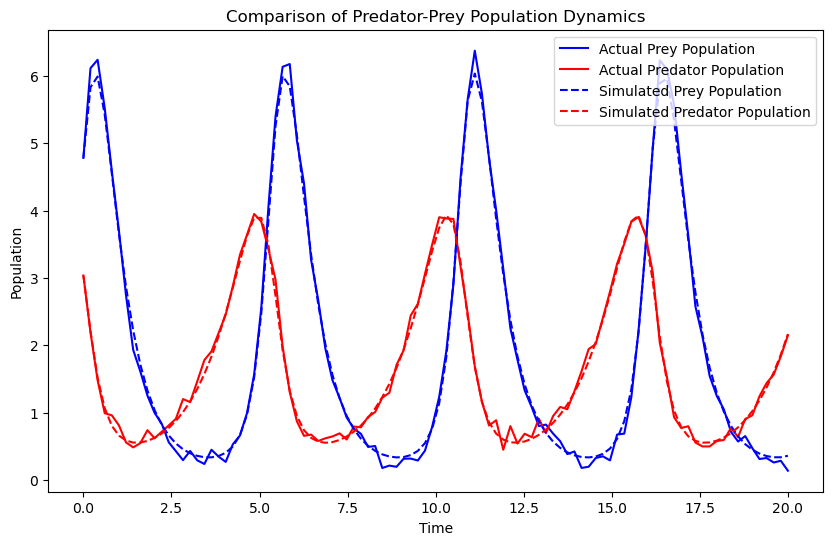

In [51]:
plot_sim(optimized_params, data)


[-1.87711414 -1.09073479 -0.46301668 -0.91157402]


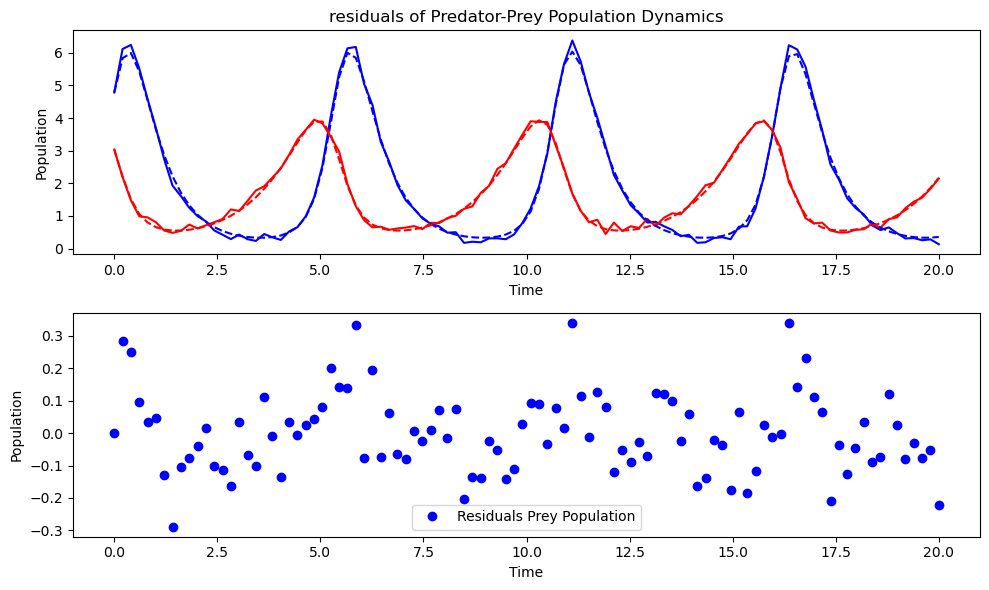

(2.3236198009550155, 0.16486242232702708)


(array([ 3.,  5., 16., 24., 13., 17.,  8.,  6.,  4.,  4.]),
 array([-0.15037421, -0.11122147, -0.07206873, -0.03291599,  0.00623675,
         0.04538948,  0.08454222,  0.12369496,  0.1628477 ,  0.20200044,
         0.24115318]),
 <BarContainer object of 10 artists>)

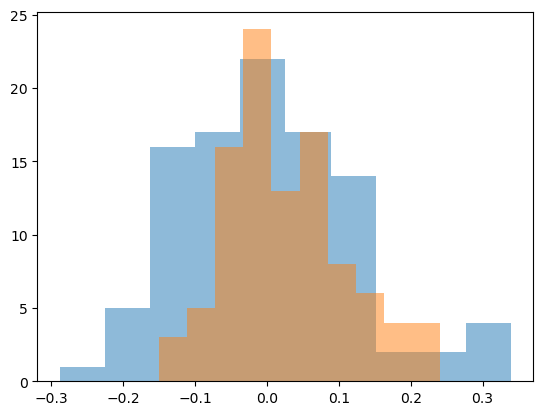

In [52]:
simulated = sim_lv(optimized_params, data['t'])
print(optimized_params)
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot(211)
ax2.plot(data['t'], data['x'], 'b-', label='Actual Prey Population')
ax2.plot(data['t'], data['y'], 'r-', label='Actual Predator Population')
ax2.plot(data['t'], simulated[:, 0], 'b--',
            label='Simulated Prey Population')
ax2.plot(data['t'], simulated[:, 1], 'r--',
            label='Simulated Predator Population')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.set_title('Comparison of Predator-Prey Population Dynamics')
ax1 = fig.add_subplot(212)
ax1.plot(data['t'], data['x']-simulated[:, 0], 'bo',
            label='Residuals Prey Population')
# ax1.plot(data['t'], data['y']-simulated[:, 1], 'ro',
#             label='Residuals Predator Population')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax2.set_title('residuals of Predator-Prey Population Dynamics')
ax1.legend()
plt.tight_layout()
plt.show()
print(calculate_errors(optimized_params, data))
plt.hist(data['x']-simulated[:, 0], bins=10,alpha = 0.5)
plt.hist(data['y']-simulated[:, 1], bins=10,alpha = 0.5)

In [53]:
from scipy import stats

contingency_table = np.array([
    [sum(data['y']), sum(simulated[:, 1])],
    [sum(data['x']), sum(simulated[:, 0])]
])

# Perform chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Make a decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. The model fits well.")

Chi-square statistic: 0.0014856668932226366
P-value: 0.9692536717962031
Degrees of freedom: 1
Expected frequencies:
[[163.28764959 162.06448669]
 [201.72440224 200.21331549]]
Fail to reject the null hypothesis. The model fits well.


Optimized Parameters: [-2.02748912 -1.13671319 -0.44162828 -0.84144125]
Error (SSE) between simulated and original data: 2.9940047922942243
Error (MAE) between simulated and original data: 0.18978238746664786


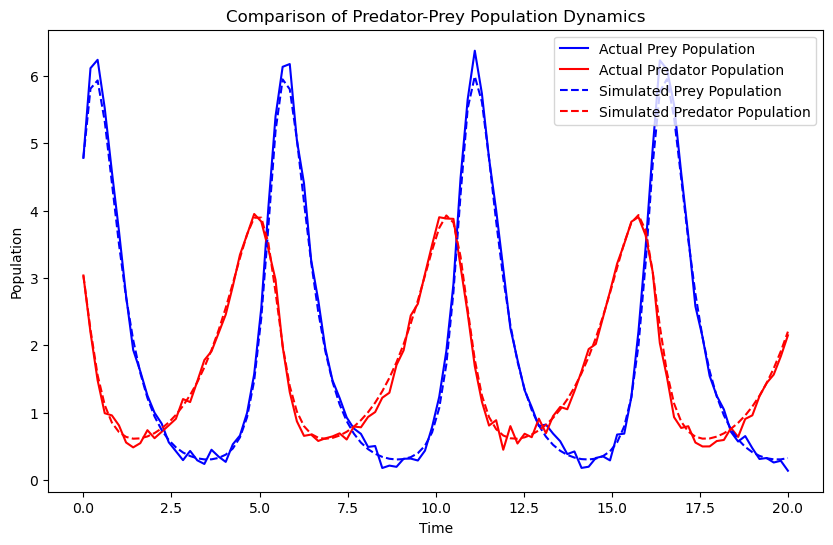

In [ ]:
i=0
starting = np.array([-2, -1.15, -0.4, -0.85]) # based on numerous runs
## choose hill_climbing or simulated_annealing and mae or sse
optimized_params =optimize_parameters(data,'hill_climbing', 'sse', 10000, 1, starting)
print("Optimized Parameters:", optimized_params)
sse_error, mae_error = calculate_errors(optimized_params, data)
print("Error (SSE) between simulated and original data:", sse_error)
print("Error (MAE) between simulated and original data:", mae_error)
starting = optimized_params
i +=1
plot_sim(optimized_params, data)


In [ ]:
def sim_dropped_pts(data,starting,dropped_pts,step=3):
    n_reps = 3
    og_starting = np.array([-2, -1.15, -0.4, -0.85])
    dropped_pts = 4
    fit_failed=False

    simrun_data =[]

    while not fit_failed:
        print(dropped_pts)
        error_n_dropped = (dropped_pts,
                        [],#errors
                        [], #parameters
                        )
        for i in range(n_reps):
            if i == 0:
                sse_min = sse
            
            data_copy = data.drop(data.sample(dropped_pts).index, inplace=False)
            optimized_params = optimize_parameters(data = data_copy ,i=5000,method='simulated_annealing',func = 'sse',temp=4,array=starting)
            sse,mae=calculate_errors(optimized_params,data)
            error_n_dropped[1].append((sse,mae))
            error_n_dropped[2].append(optimized_params)
            print("Error (SSE) between simulated and original data:", sse)
            print("Error (MAE) between simulated and original data:", mae)
            #plot_sim(optimized_params,data)

        simrun_data.append(error_n_dropped)
        if sse>15:
            fit_failed=True
        dropped_pts += step
        

4


Error (SSE) between simulated and original data: 4.55715587081375
Error (MAE) between simulated and original data: 0.22341774303706913
Error (SSE) between simulated and original data: 3.981269479357916
Error (MAE) between simulated and original data: 0.22540130272573639
Error (SSE) between simulated and original data: 3.7718041506717315
Error (MAE) between simulated and original data: 0.20836864748832892
7
Error (SSE) between simulated and original data: 5.476997793108462
Error (MAE) between simulated and original data: 0.23943031203004253
Error (SSE) between simulated and original data: 27.95405111670357
Error (MAE) between simulated and original data: 0.5086555451534885
Error (SSE) between simulated and original data: 5.508775189691392
Error (MAE) between simulated and original data: 0.23641707452126767
10
Error (SSE) between simulated and original data: 41.46865979907444
Error (MAE) between simulated and original data: 0.6462809079378866
Error (SSE) between simulated and original da

In [ ]:
n_dropped_points = []
mean_errors = []
std_errors = []
max_sse = 0
outlier=None
for i,errors,parameters in simrun_data:
    n_dropped_points.append(i)
    sse_list = []
    mae_list = []
    for (sse,mae),param in zip(errors,parameters):
        
        if sse>max_sse:
            max_sse = sse
            outlier = param
        sse_list.append(sse)
        mae_list.append(mae)
    mean_errors.append(np.mean(sse_list))
    std_errors.append(np.std(sse_list)/np.sqrt(len(sse_list)))

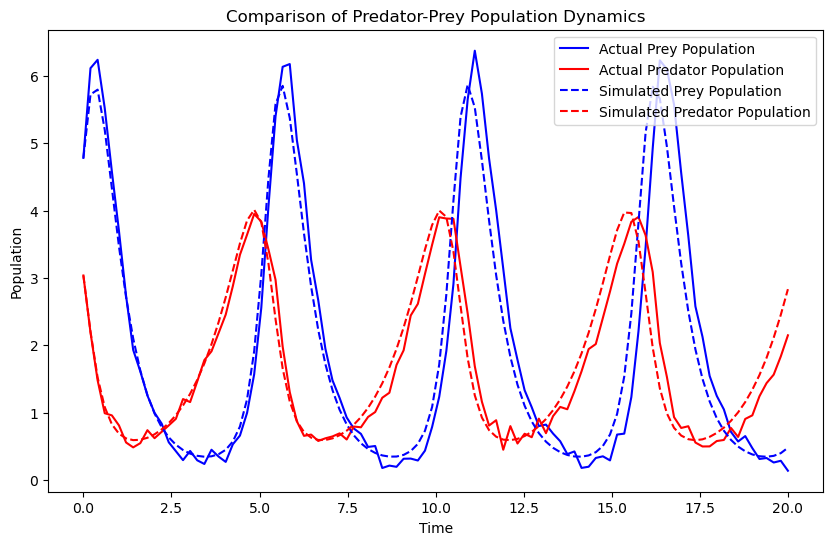

In [ ]:
plot_sim(param,data)

<ErrorbarContainer object of 3 artists>

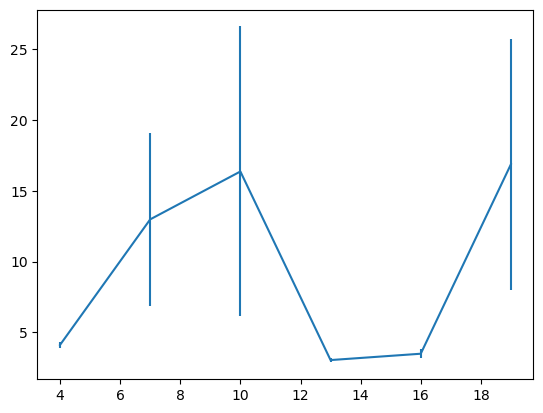

In [ ]:
plt.errorbar(n_dropped_points,mean_errors,y_err=std_errors)

In [106]:
# Example real data (replace with your actual observed data)
time_steps = data['t']
observed_predators = data['x']
observed_prey = data['y']

# Number of simulations
num_simulations = 10

starting = np.array([alpha,beta,delta,gamma])

alpha = -2
print(starting)
# Example simulated data (replace with your actual simulated data)
num_simulations = 5
simulated_populations = [sim_lv(optimize_parameters(data,method = 'hill_climbing', func='mae', i=5000, temp = temp, array= starting), time_steps) for _ in range(num_simulations)]
print(np.shape(simulated_populations))

[-2.         -0.58946135 -0.39533502 -1.46000065]


c:\Users\bruno\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(5, 100, 2)


(100, 2)
[[4.78163509 3.03525736]
 [5.59364569 2.08227979]
 [5.61707486 1.36133554]
 [4.94843912 0.92298975]
 [4.07216062 0.6786936 ]
 [3.2296397  0.54700547]
 [2.51312502 0.47993998]
 [1.93908298 0.45250628]
 [1.49378015 0.45222178]
 [1.1547404  0.47318063]
 [0.89957135 0.51308692]
 [0.70905042 0.5718106 ]
 [0.56778956 0.65069034]
 [0.46397347 0.75220507]
 [0.38882436 0.87982772]
 [0.33607278 1.03795801]
 [0.30155715 1.23185855]
 [0.28302664 1.46750636]
 [0.28024283 1.75121545]
 [0.29557679 2.08874929]
 [0.33554351 2.45194094]
 [0.41426397 2.83074485]
 [0.56095367 3.22845694]
 [0.83498758 3.60176629]
 [1.34896307 3.86164718]
 [2.26650606 3.86182047]
 [3.63871819 3.46251469]
 [5.03794842 2.69698957]
 [5.68782851 1.83264179]
 [5.51231517 1.20251554]
 [4.77080671 0.83318199]
 [3.88778853 0.62984741]
 [3.06754692 0.52142226]
 [2.38105579 0.46822544]
 [1.83566859 0.44992223]
 [1.41460489 0.45646926]
 [1.09493923 0.4832725 ]
 [0.85480281 0.52879757]
 [0.67576833 0.59340944]
 [0.5432347  0.6

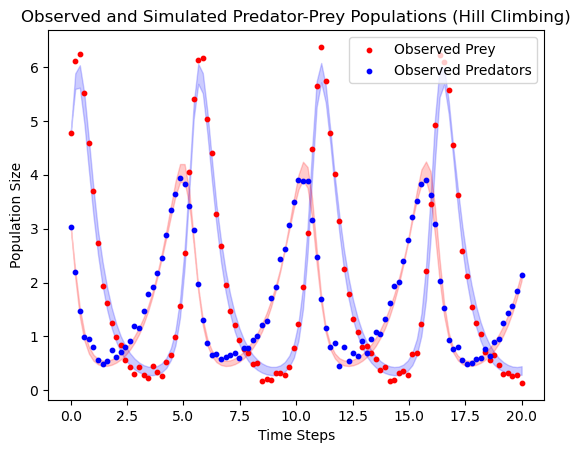

In [105]:
min, max = np.ones(simulated_populations[0].shape)*1000, np.zeros(simulated_populations[0].shape)

print(np.shape(min))
for sim in simulated_populations:
    for idx, (i,j) in enumerate(sim):
        if i < min[idx,0]:
            min[idx,0] = i
        if i > max[idx,0]:
            max[idx,0] = i
        if j > max[idx,1]:
            max[idx,1] = j
        if j < min[idx,1]:
            min[idx,1] = j

print(min)

fig, ax = plt.subplots()
ax.fill_between(time_steps, min[:,0], max[:,0], color='blue', alpha=.2)
ax.fill_between(time_steps, min[:,1], max[:,1], color='red', alpha=.2)
ax.set_title('fill between y1 and 0')

#Plot observed data
plt.scatter(time_steps, observed_predators, label='Observed Prey', color='red',s=10)
plt.scatter(time_steps, observed_prey, label='Observed Predators', color='blue',s=10)	



#Customize plot labels, legend, etc.
plt.xlabel('Time Steps')
plt.ylabel('Population Size')
plt.title('Observed and Simulated Predator-Prey Populations (Hill Climbing)')
plt.legend()
plt.show()